In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 
import statistics as st

In [4]:
# importing data

data = pd.read_csv('Brazil Housing.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
# seperating data types

def seprate_data_types(data):
    categorical = []
    continuous = []
    for column in data.columns:                
        if data[column].nunique() < 43:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(data)         

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [6]:
# info for categorical data

def info_of_cat(col): 
    print(f"Unique values in {col} are: {data[col].unique()}") 
    print(f"Mode of {col} is {data[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {data[col].isnull().sum()}") 
    if data[col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {col} column")

In [ ]:
# info for continous data

def info_num(col):
    print(f"The mean of the {col} is {data[col].mean()}")
    print(f"The median of the {col} is {data[col].median()}")
    print(f"The mode of the {col} is {data[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {data[col].std()}")
    print(f"Number of missing values in the {col} is {data[col].isnull().sum()}")

In [8]:
# checking for null values

data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

### City wise rental houses

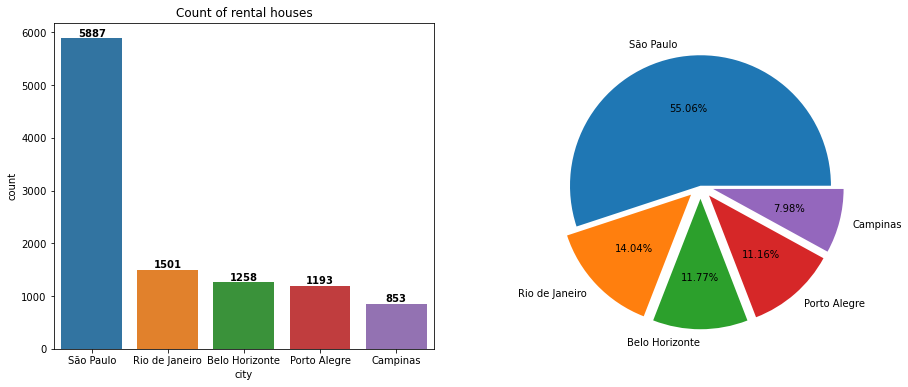

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.countplot(x = data['city'], data = data,order = data['city'].value_counts().index, ax = ax[0]).set(title='Count of rental houses')
for i in ax[0].patches:
    x=i.get_x()+i.get_width()/2
    y=i.get_height()
    ax[0].annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
percentage = data['city'].value_counts()         
labels = list(data['city'].value_counts().index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode=[0,0.1,0.1,0.1,0.1]);

Sao Paulo and Rio de janerio have the maximum number of houses for rent

In [264]:
t0=data.pivot_table(index='city',values='property tax (R$)')
t0['city']=t1.index
t0

,property tax (R$),city
city,,
Belo Horizonte,272.782194,Belo Horizonte
Campinas,147.657679,Campinas
Porto Alegre,124.021794,Porto Alegre
Rio de Janeiro,256.853431,Rio de Janeiro
São Paulo,495.701716,São Paulo


<AxesSubplot:title={'center':'City wise propery tax'}, xlabel='city', ylabel='property tax (R$)'>

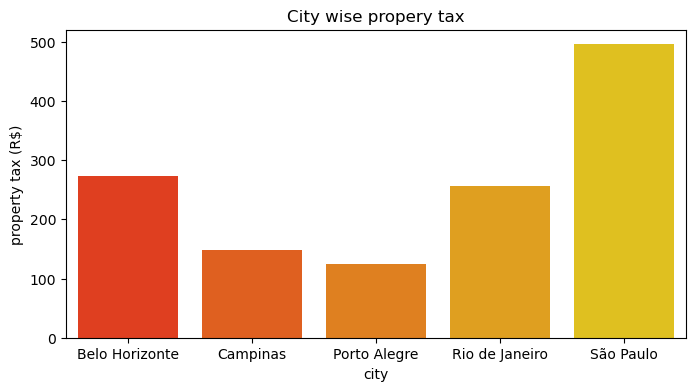

In [271]:
plt.figure(figsize=(8,4))
plt.title('City wise propery tax')
sns.barplot(x=t0['city'],y=t0['property tax (R$)'],palette='autumn')

### City wise rent

In [272]:
t1=data.pivot_table(index='city',values='total (R$)')
t1['city']=t1.index
t1

,total (R$),city
city,,
Belo Horizonte,6315.242448,Belo Horizonte
Campinas,3173.276671,Campinas
Porto Alegre,2989.782900,Porto Alegre
Rio de Janeiro,4611.684877,Rio de Janeiro
São Paulo,6380.831833,São Paulo


<AxesSubplot:title={'center':'City wise rent'}, xlabel='city', ylabel='total (R$)'>

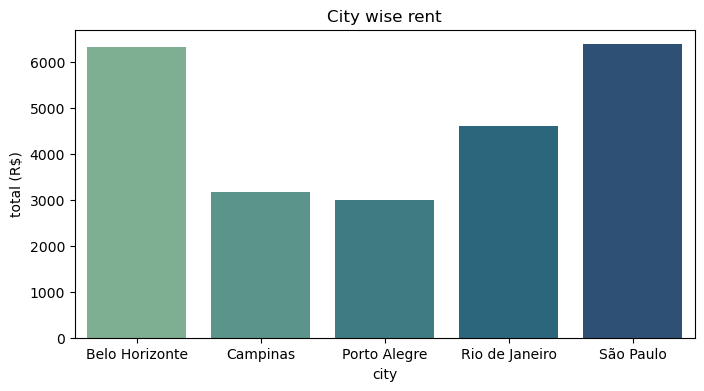

In [274]:
plt.figure(figsize=(8,4))
plt.title('City wise rent')
sns.barplot(x=t1['city'],y=t1['total (R$)'],palette='crest')

Sao Paulo and Belo Horizonte has the highest rent among the cities

### Pets allowed

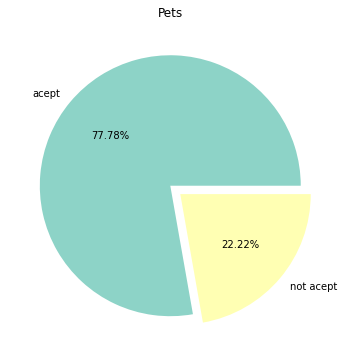

In [48]:
plt.figure(figsize=(10,6))
plt.title('Pets')
percentage = data['animal'].value_counts()  
colors = sns.color_palette('Set3')
labels = list(data['animal'].value_counts().index) 
plt.pie(percentage,labels = labels, colors=colors,autopct= "%0.2f%%",explode=[0,0.1]);

Pets are mostly accepted

### Furnitures

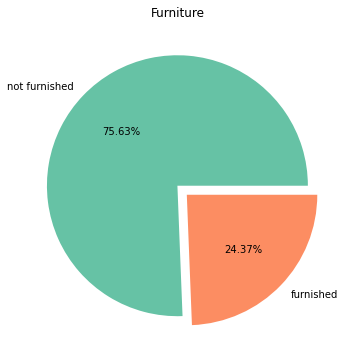

In [49]:
plt.figure(figsize=(10,6))
plt.title('Furniture')
percentage = data['furniture'].value_counts()  
colors = sns.color_palette('Set2')
labels = list(data['furniture'].value_counts().index) 
plt.pie(percentage,labels = labels, colors=colors,autopct= "%0.2f%%",explode=[0,0.1]);

Generally you dont get furnished houses

### Number of rooms

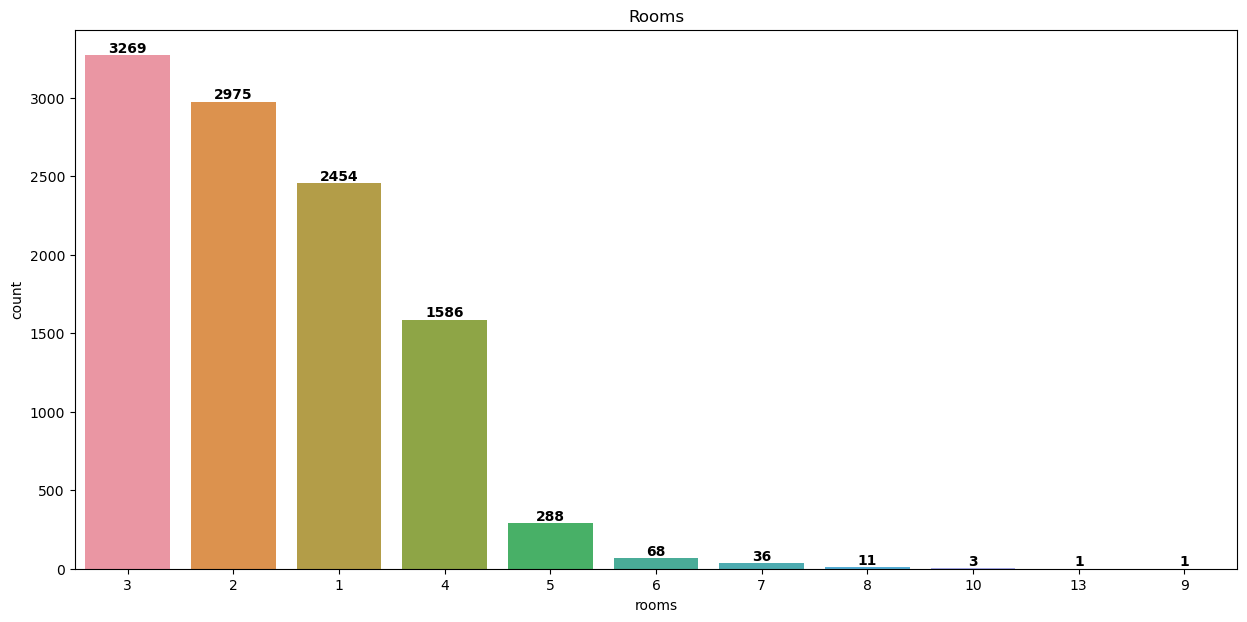

In [88]:
fig, ax = plt.subplots(figsize = (15, 7))
at_count=data['rooms'].value_counts()
label=list(data['rooms'].value_counts().index)
sns.countplot(x = data['rooms'],data=data,order=data['rooms'].value_counts().index)
for p in ax.patches:
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
plt.title('Rooms')
plt.show()

3 and 2 bedroom houses are the most popular ones

### Parking space

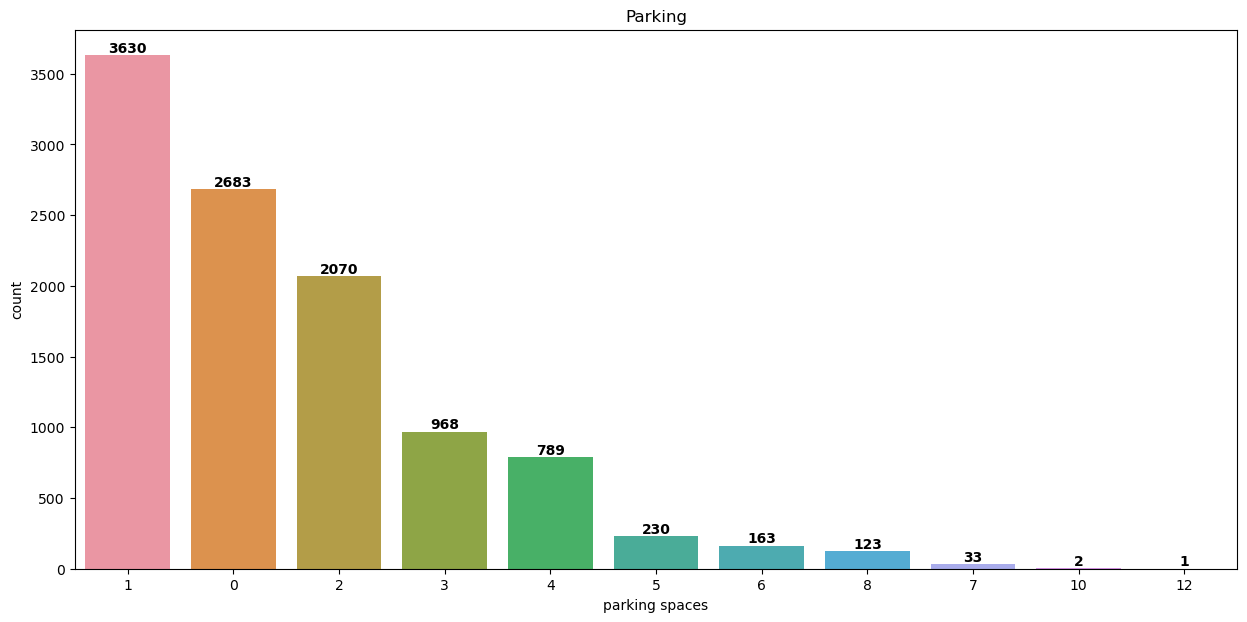

In [89]:
fig, ax = plt.subplots(figsize = (15, 7))
at_count=data['parking spaces'].value_counts()
label=list(data['parking spaces'].value_counts().index)
sns.countplot(x = data['parking spaces'],data=data,order=data['parking spaces'].value_counts().index)
for p in ax.patches:
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
plt.title('Parking')
plt.show()

Most of the houses has atleast 1 parking space 

### Bathrooms

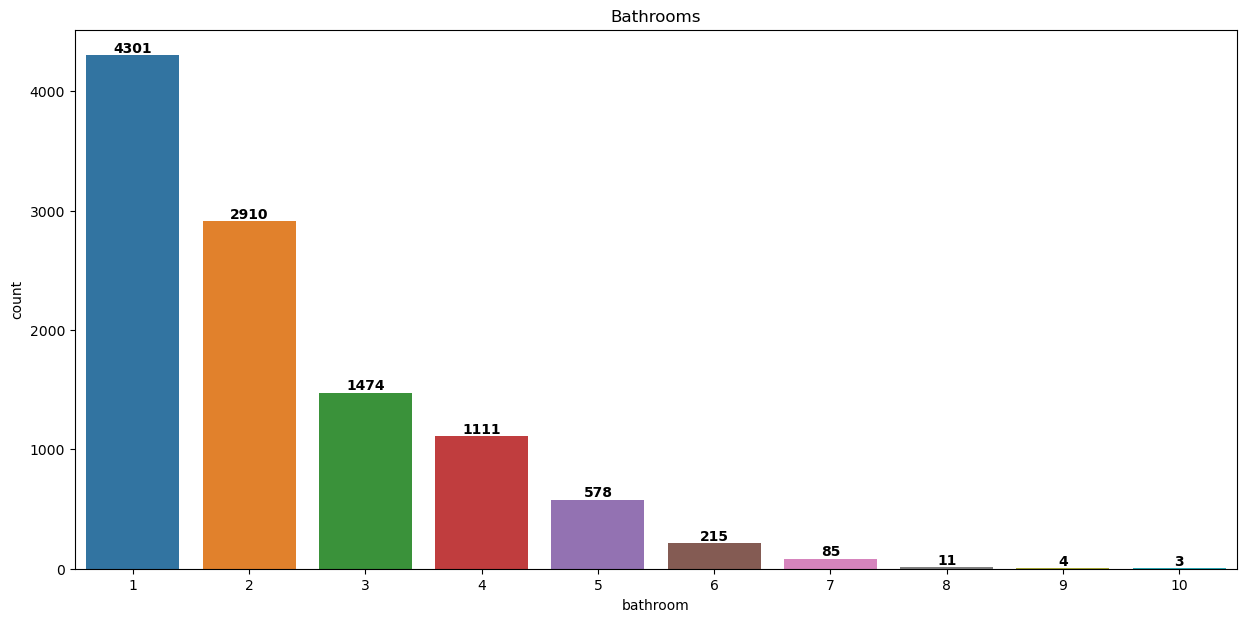

In [90]:
fig, ax = plt.subplots(figsize = (15, 7))
at_count=data['bathroom'].value_counts()
label=list(data['bathroom'].value_counts().index)
sns.countplot(x = data['bathroom'],data=data,order=data['bathroom'].value_counts().index)
for p in ax.patches:
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
plt.title('Bathrooms')
plt.show()

Houses with 1 and 2 bathrooms are popular

### Area

In [66]:
print('Mean of the area in all cities ',data['area'].mean())

Mean of the area in all cities  149.21791994014217


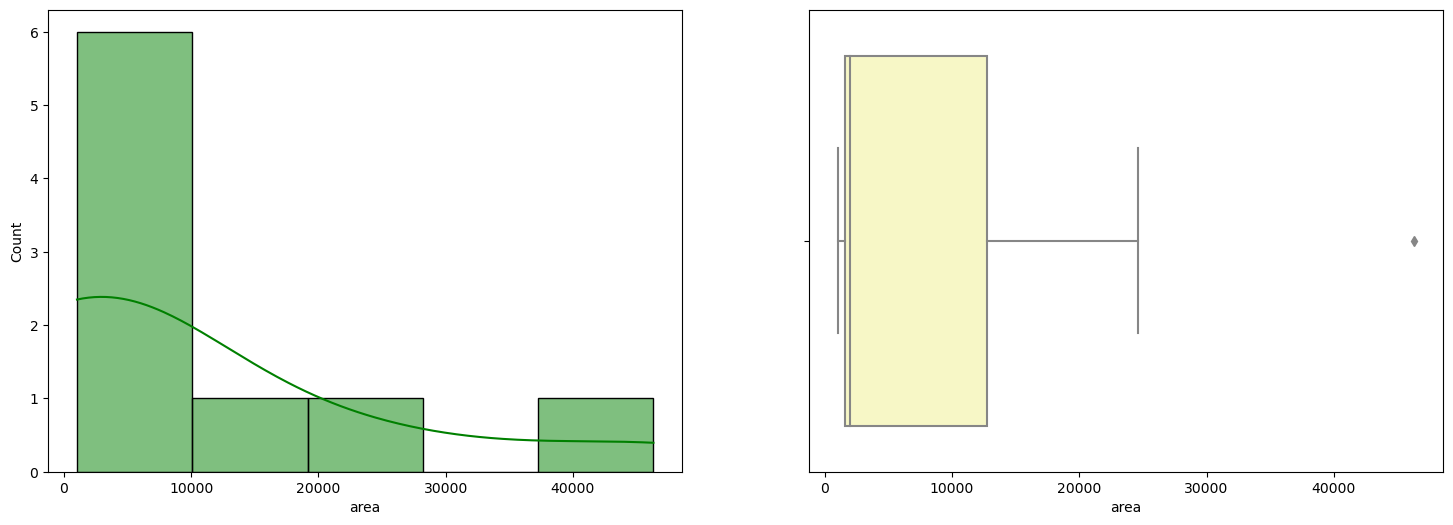

In [279]:
# greater than 1000

t2=data[(data['area'])>1000]
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = t2['area'], ax = ax[0],kde=True,color='g') 
sns.boxplot(x = t2['area'],palette='Spectral', ax = ax[1])
plt.show()

people prefer less than 10000 sq m of area

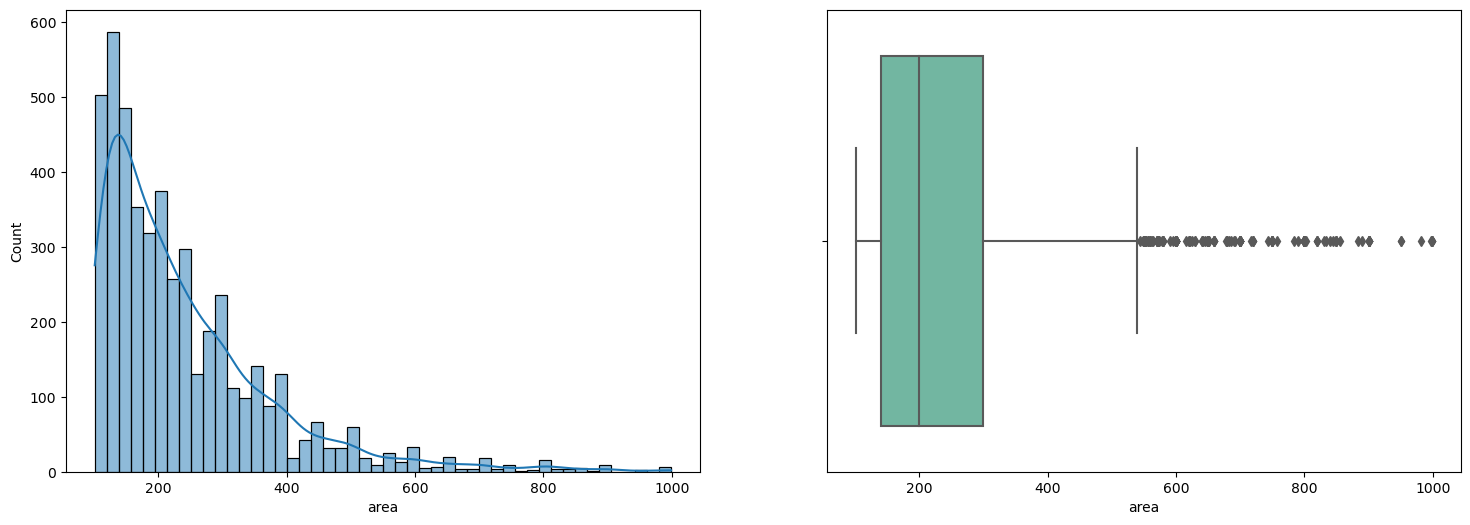

In [115]:
# greater than 1000

t3=data[(data['area'] > 100 )& (data['area'] < 1000)]
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = t3['area'], ax = ax[0],kde=True,palette='Set3') 
sns.boxplot(x = t3['area'],palette='Set2', ax = ax[1])
plt.show()

people prefer 100 to 400 sq m of area

### Selecting the cities with relatively low rent

1.Porto Alegre
2.Campinas
3.Rio de Janeiro

In [91]:
data1 = data[(data['city'] != 'São Paulo') & (data['city'] != 'Belo Horizonte')]
data1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181


### Pets

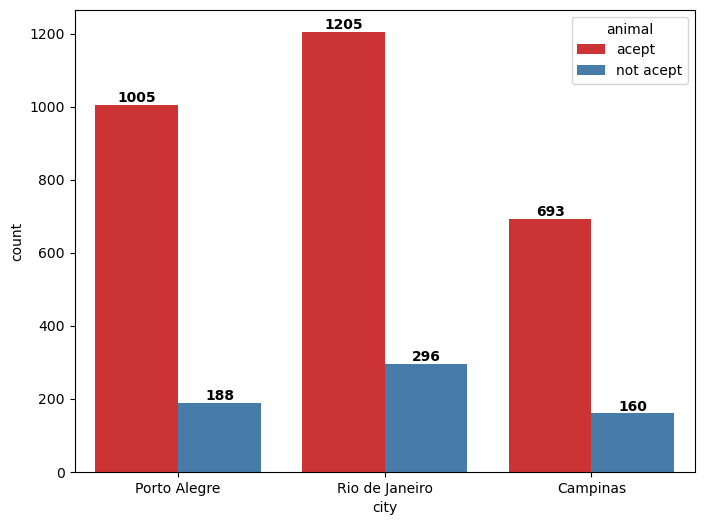

In [98]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(x = 'city', hue = 'animal', data = data1, palette='Set1')
for p in ax.patches: 
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
plt.show()

Rio and Porto Alegre has the most no of houses which accepts pet

### Furniture 

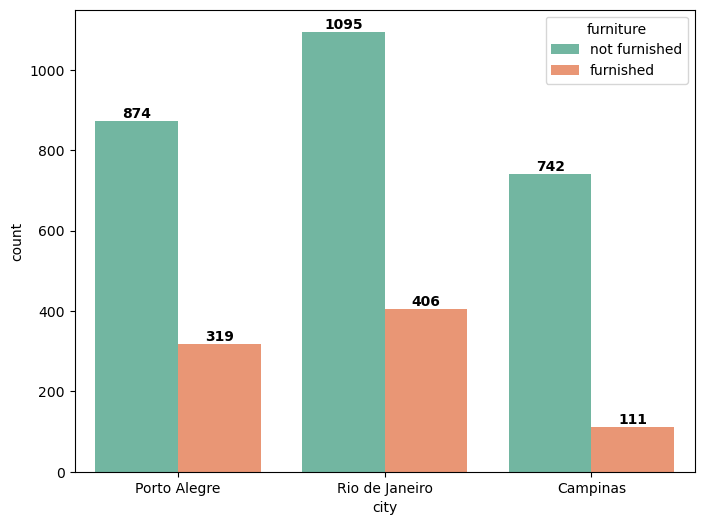

In [100]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(x = 'city', hue = 'furniture', data = data1, palette='Set2')
for p in ax.patches: 
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
plt.show()

In [ ]:
Rio and Porto Alegre has the most no of furnished houses

### Rooms

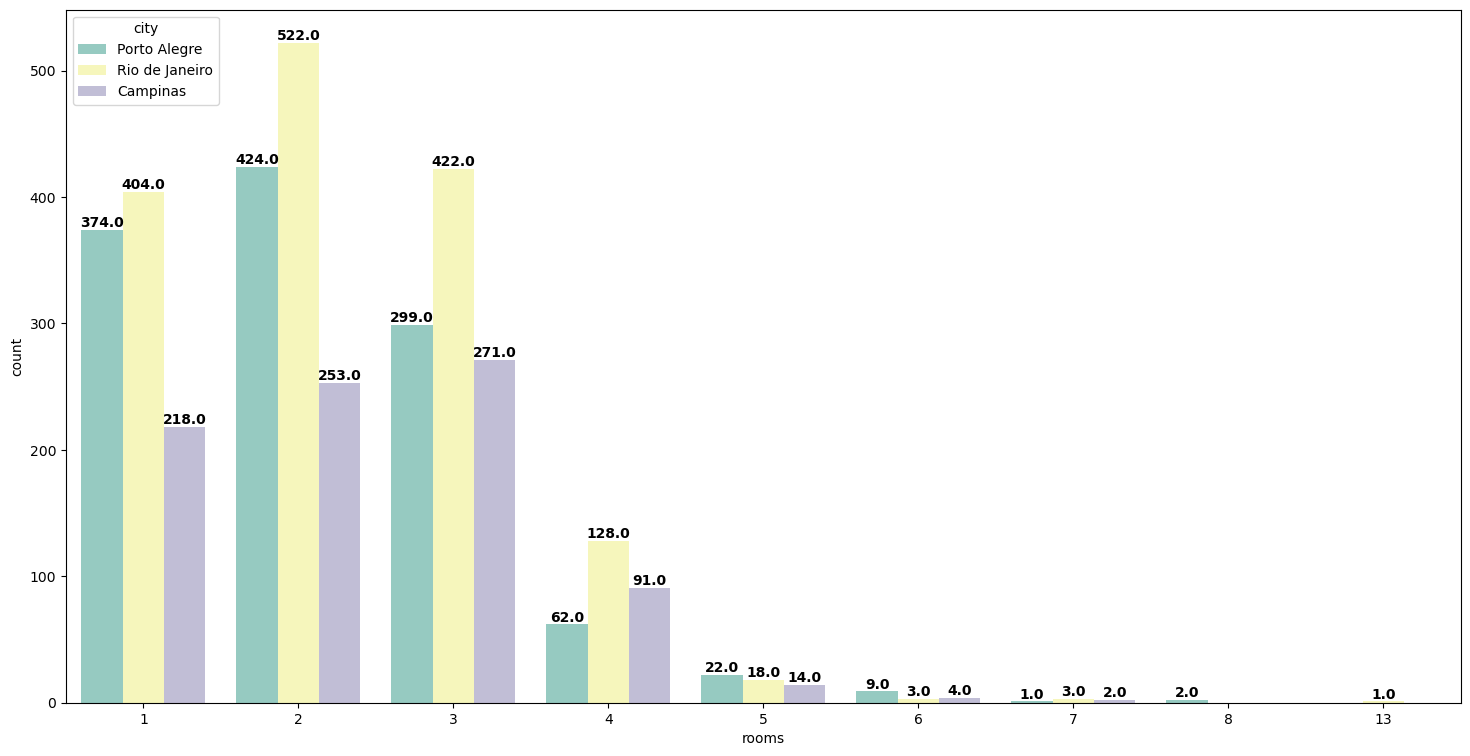

In [106]:
fig, ax = plt.subplots(figsize = (18, 9))
sns.countplot(x = 'rooms', hue = 'city', data = data1, palette='Set3')
for p in ax.patches: 
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
plt.show()

Most no of 2bhk houses are available in Rio and Porto

### Parking

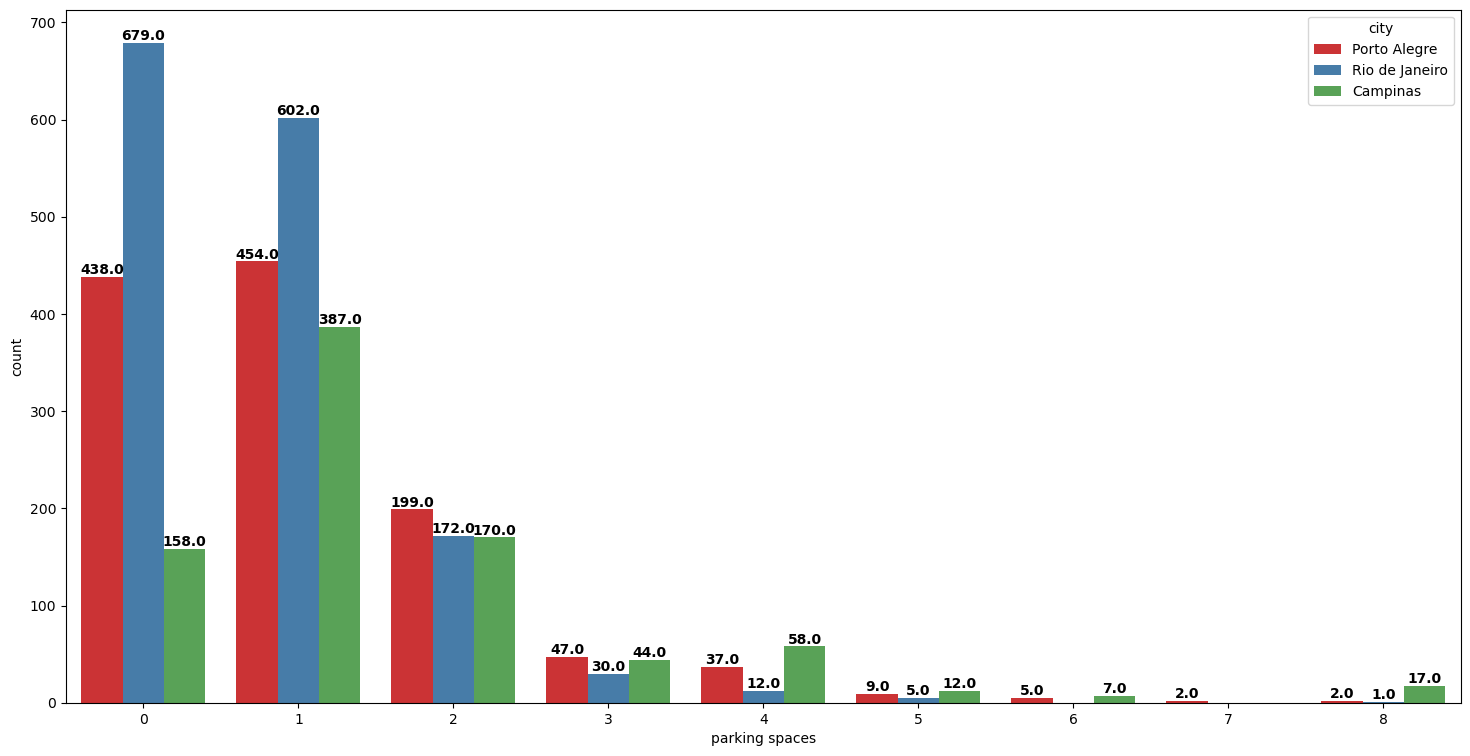

In [117]:
fig, ax = plt.subplots(figsize = (18, 9))
sns.countplot(x = 'parking spaces', hue = 'city', data = data1, palette='Set1')
for p in ax.patches: 
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
plt.show()

Houses with atleast one parking space are available in Rio and Porto

### Bathrooms

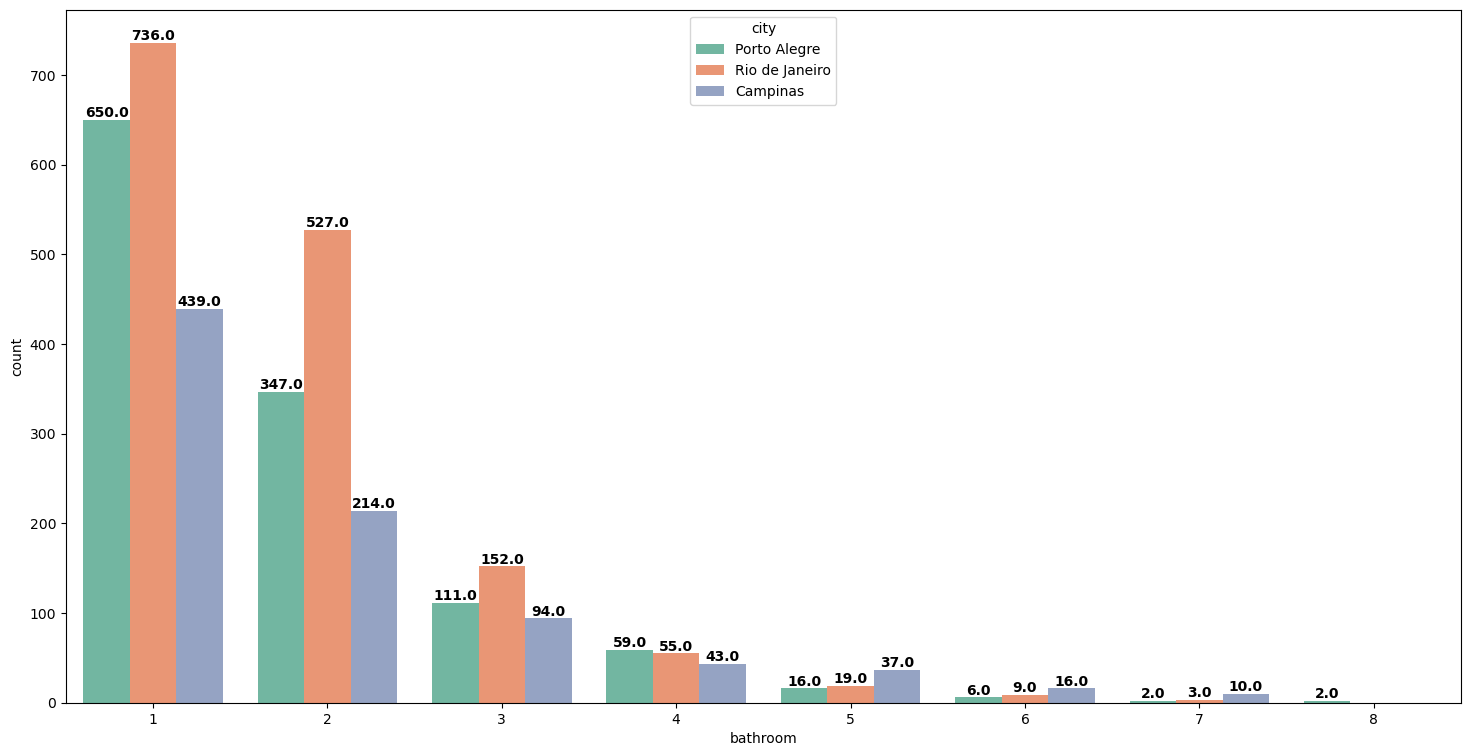

In [119]:
fig, ax = plt.subplots(figsize = (18, 9))
sns.countplot(x = 'bathroom', hue = 'city', data = data1, palette='Set2')
for p in ax.patches: 
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
plt.show()

Rio and Porto has more no of houses which has 1 or 2 bathrooms

### Area

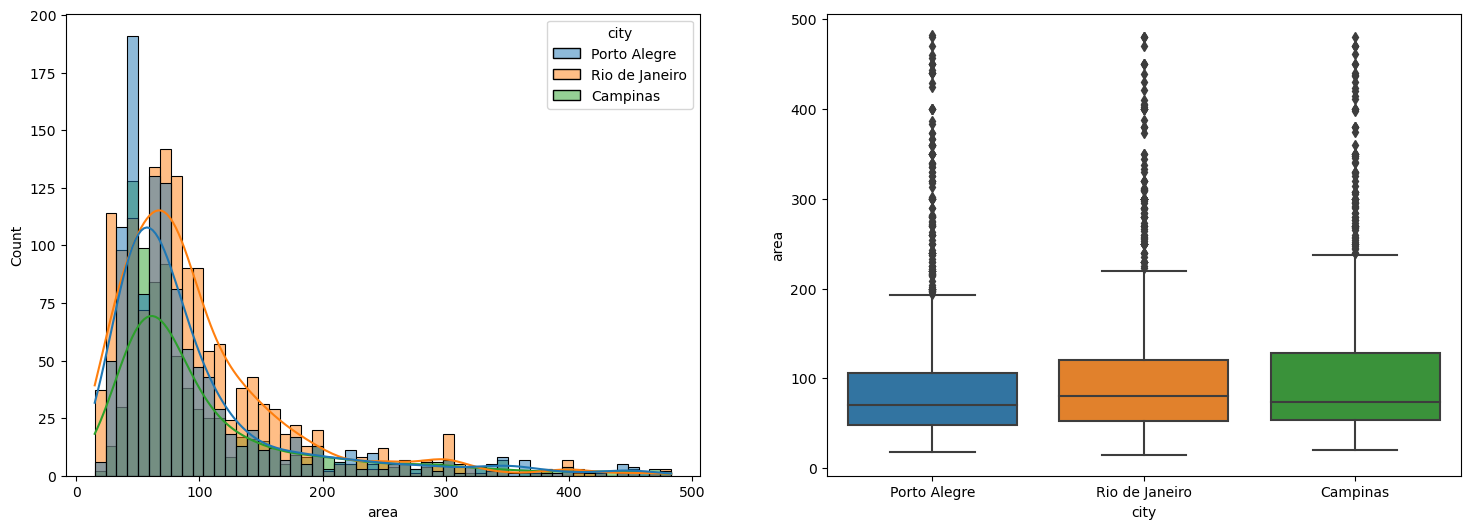

In [219]:
t10=data1[(data1['area']<500)]
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = t10['area'], hue = t10['city'],ax = ax[0],kde=True) 
sns.boxplot(y = t10['area'],x = t10['city'], ax = ax[1])
plt.show()

### Rent

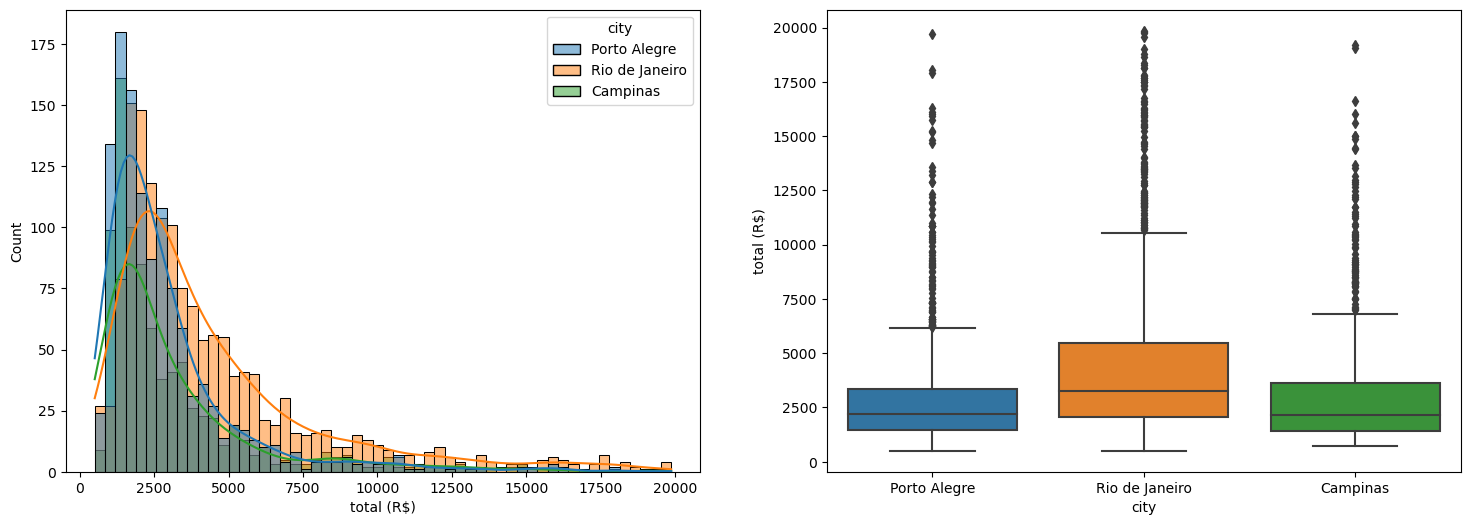

In [240]:
t11=data1[(data1['total (R$)']<20000)]
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = t11['total (R$)'], hue = t11['city'],ax = ax[0],kde=True) 
sns.boxplot(y = t11['total (R$)'],x = t11['city'], ax = ax[1])
plt.show()

1. We can see that, an ideal house for rent should atleast contain 1 parking space, 2 bedrooms, 
   1 or 2 bathrooms and atleast above 100 sq/m with considerably less rent
   
2. Furnished houses may be a choice since most of the houses are not finished

3. Animals should be allowed

Since houses on Rio has high cost when compared to on Campinas and Porto, we can ignore it.

In [222]:
data2 = data1[(data1['city'] != 'Rio de Janeiro')]

### Relation between rooms and rent

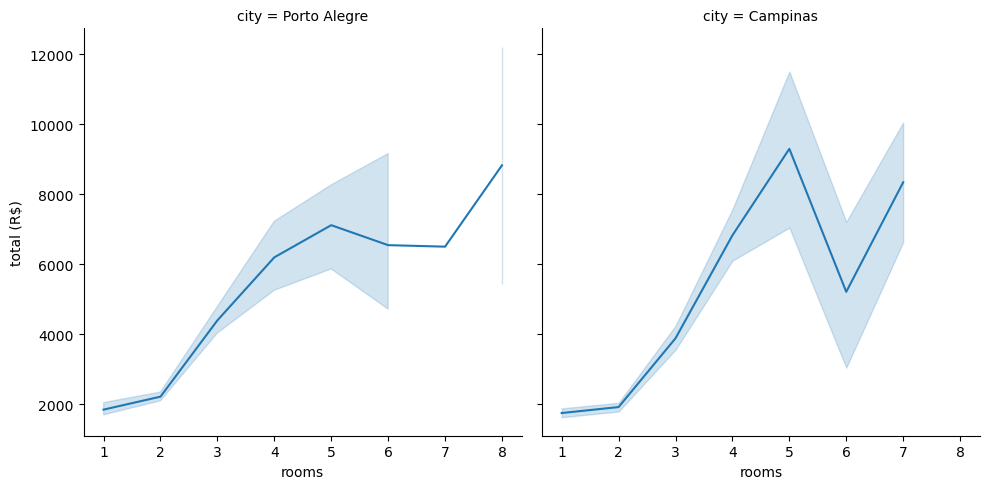

In [223]:
sns.relplot(data = data2, x = 'rooms', y= 'total (R$)',kind = 'line',col='city')

We can see that rent increases with the no of rooms in the house and campinas is slightly costlier

### Relation between parking and rent

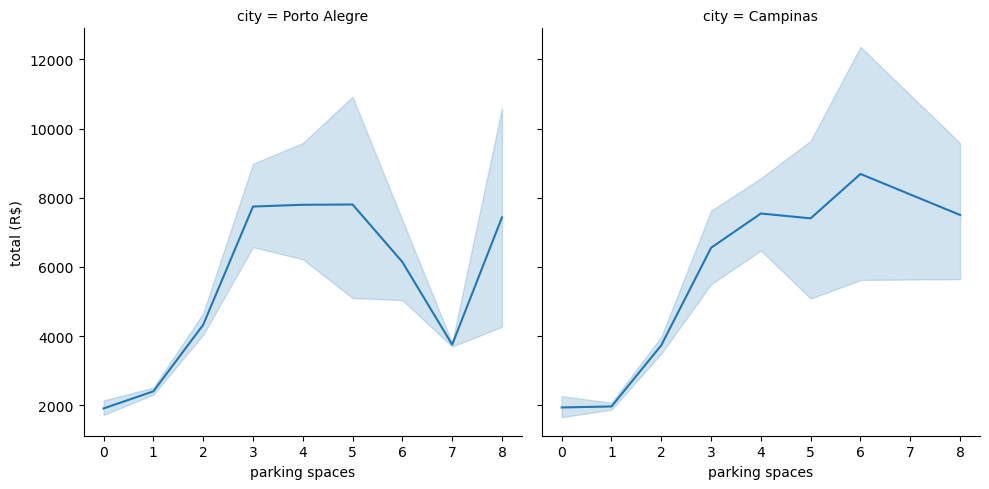

In [224]:
sns.relplot(data = data2, x = 'parking spaces', y= 'total (R$)',kind = 'line',col='city')

We can see that rent increases with the no of parking space in the house and campinas is slightly costlier

### Relation between bathrooms and rent

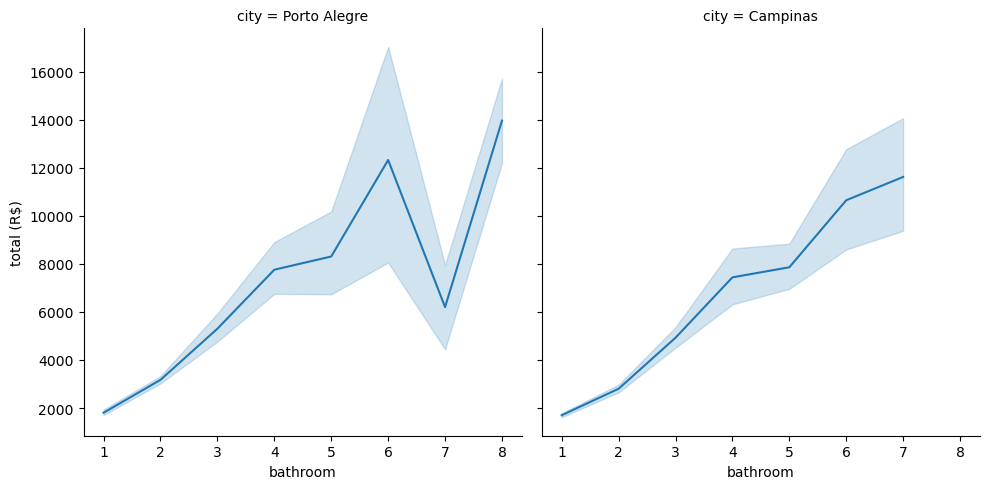

In [225]:
sns.relplot(data = data2, x = 'bathroom', y= 'total (R$)',kind = 'line',col='city')

We can see that rent increases with the no of bathrooms in the house and Porto is slightly costlier

### Floor and Rent

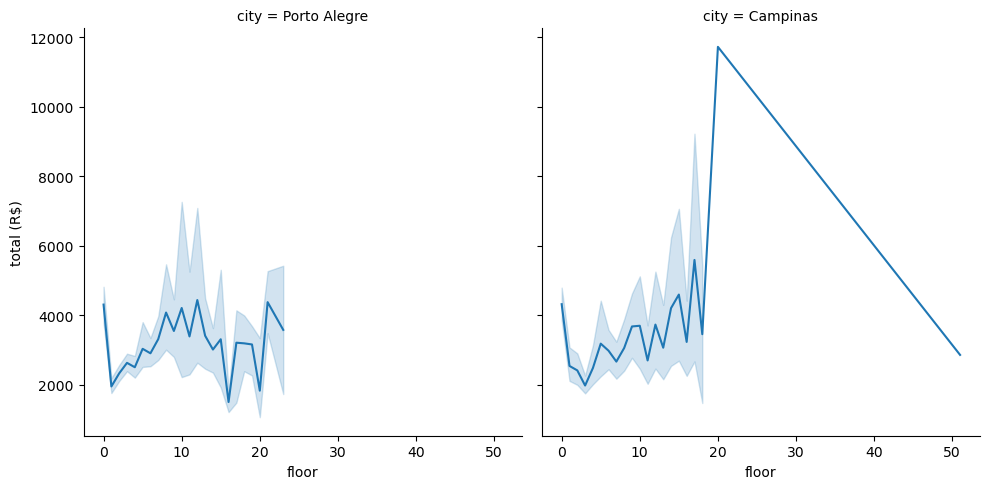

In [247]:
sns.relplot(data = data2, x = 'floor', y= 'total (R$)',kind = 'line',col='city')

We can see that rent increases with the no of bathrooms in the house and Campinas is slightly costlier

### Relation between area and Rent 

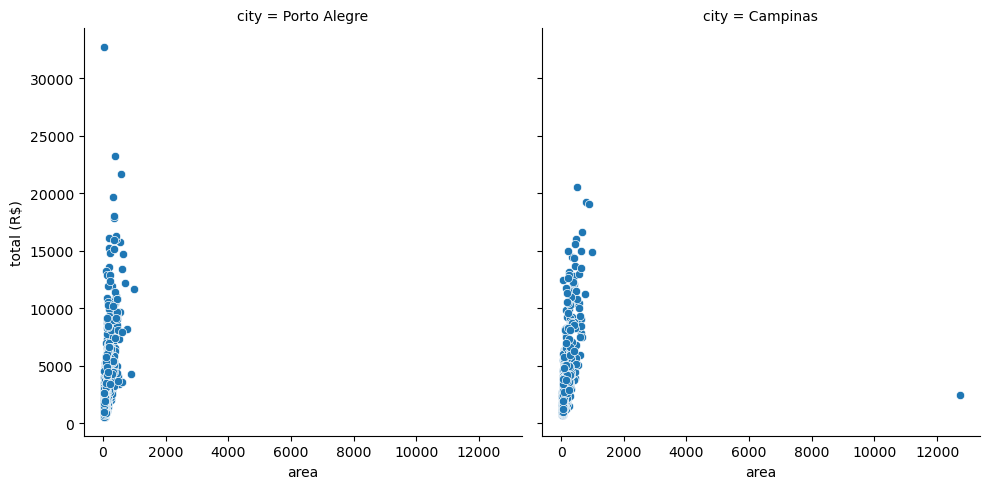

In [226]:
sns.relplot(data = data2, x = 'area', y= 'total (R$)',kind = 'scatter',col='city')

The area doesnt seem to affect the rent that much and almost both the cities have same rentals

### Area and City

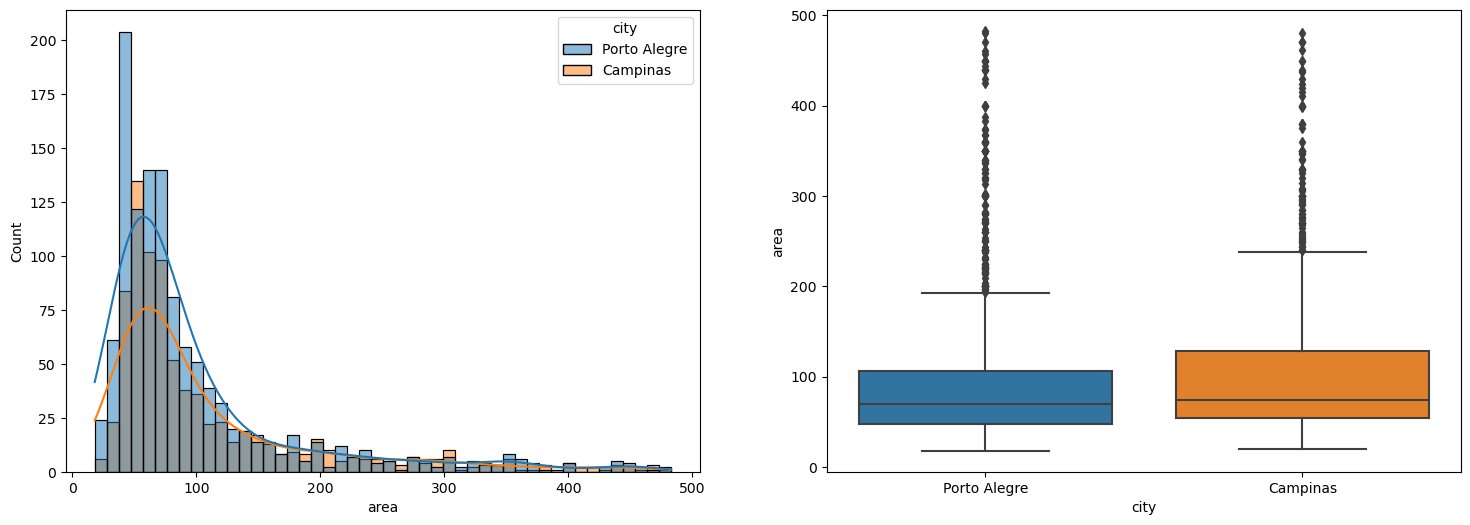

In [227]:
t8=data2[(data2['area']<500)]
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = t8['area'], hue = t8['city'],ax = ax[0],kde=True) 
sns.boxplot(y = t8['area'],x = t8['city'], ax = ax[1])
plt.show()

The houses in porto seems to be around 50 sq m and the houses in campinas seems to be slightly above 50 sq m

### Rent and City

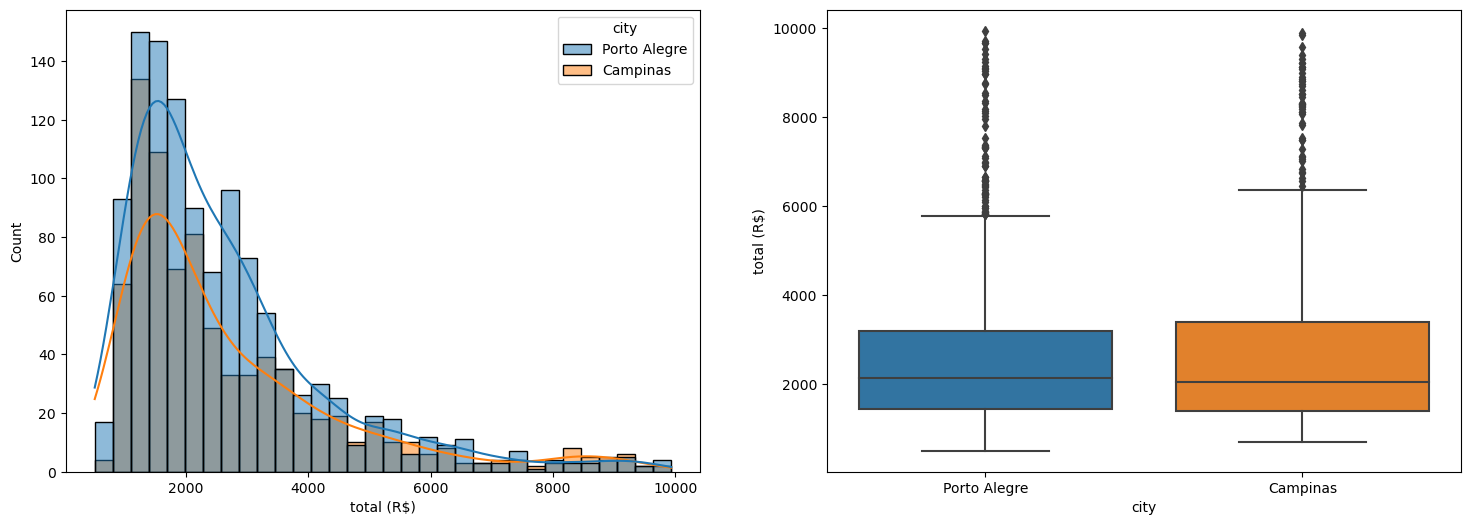

In [228]:
t7=data2[(data2['total (R$)']<10000)]
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = t7['total (R$)'], hue = t7['city'],ax = ax[0],kde=True) 
sns.boxplot(y = t7['total (R$)'],x = t7['city'], ax = ax[1])
plt.show()

The houses in porto seems to be having a rental of around 2000 $  and 
the houses in campinas seems to behaving a rental of slightly less than 2000 $ 

So, On comparing with various parameters and features, we can conclude that both Porto Alegre and campinas are suitable for relocation.

Given that Porto Alegre is slightly on the costlier side but given that it has more facilities and options to choose.

So, we can say that Porto Alegre is best suitable for relocating.

### Comparing Porto Alegre with the Costliest city

In [233]:
data3 = data[(data['city'] == 'São Paulo')|(data['city']== 'Porto Alegre')]
data3.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


### Area

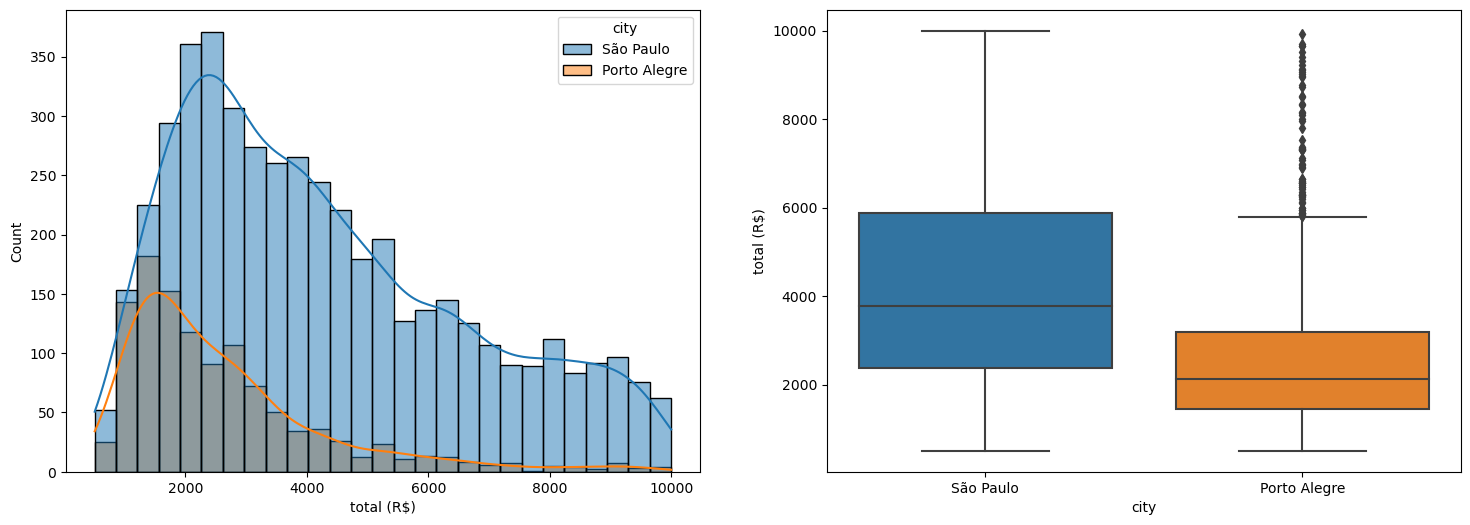

In [234]:
t9=data3[(data3['total (R$)']<10000)]
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = t9['total (R$)'], hue = t9['city'],ax = ax[0],kde=True) 
sns.boxplot(y = t9['total (R$)'],x = t9['city'], ax = ax[1])
plt.show()

### Room and Rent

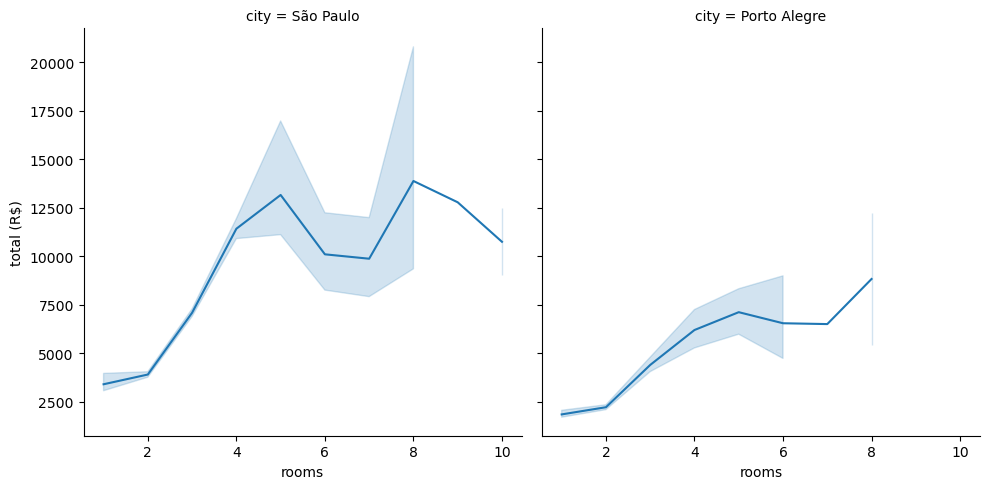

In [235]:
sns.relplot(data = data3, x = 'rooms', y= 'total (R$)',kind = 'line',col='city')

### Parking and Rent

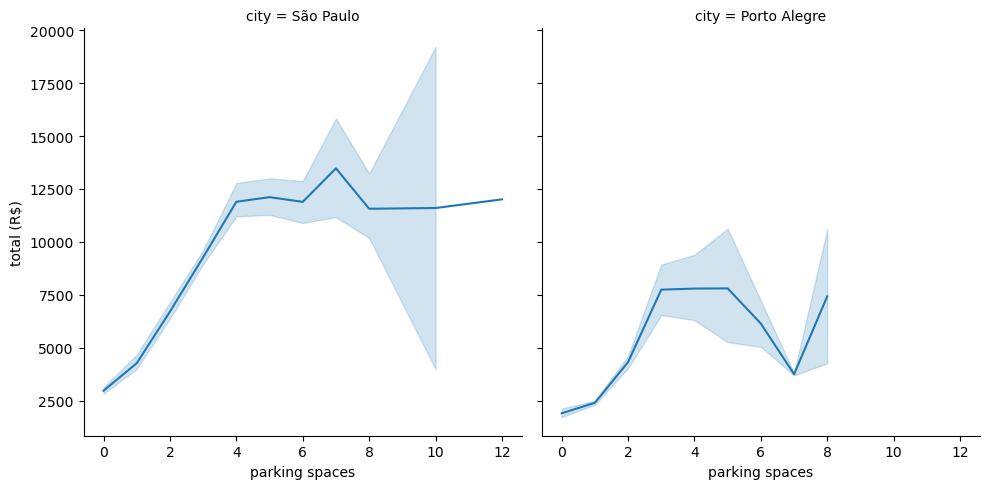

In [236]:
sns.relplot(data = data3, x = 'parking spaces', y= 'total (R$)',kind = 'line',col='city')

### Bathroom and Rent

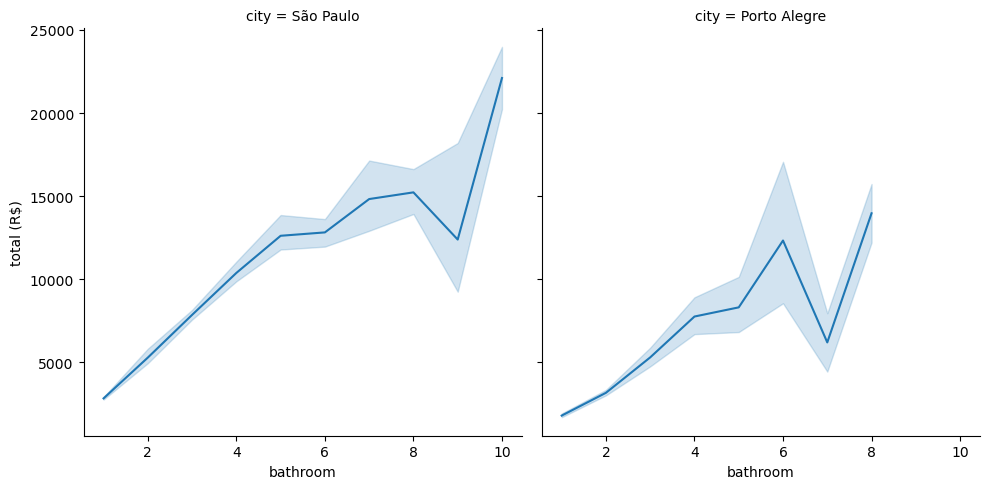

In [237]:
sns.relplot(data = data3, x = 'bathroom', y= 'total (R$)',kind = 'line',col='city')

### Area and Rent

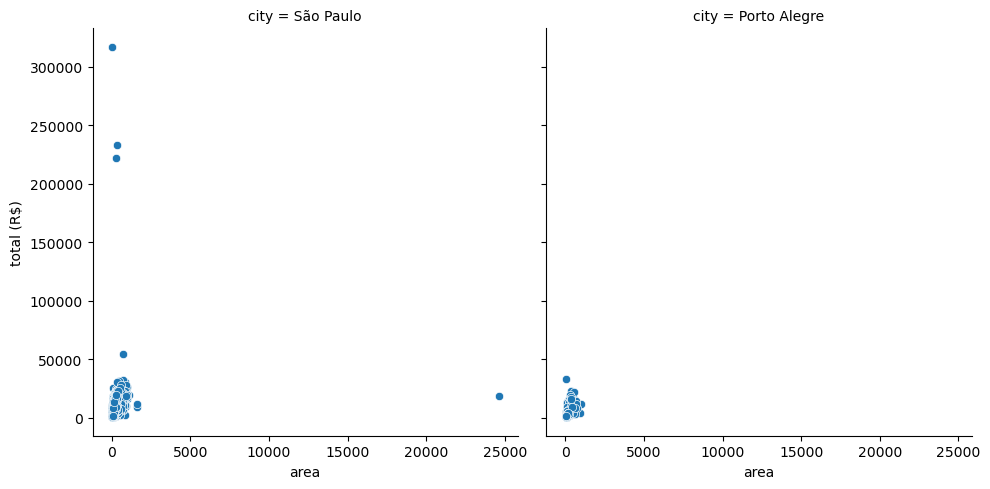

In [238]:
sns.relplot(data = data3, x = 'area', y= 'total (R$)',kind = 'scatter',col='city')

We can see that there is a significant difference in rent when compared to Sao Paulo.
Thus this adds more perspective to out conclusion

### Difference in rent for 1bhk, 2bhk and 3bhk houses

In [241]:
data4=data[data['rooms']<=3]

In [243]:
t12=pd.pivot_table(data4,index='city',columns='rooms',values='total (R$)',aggfunc='mean')
t12

rooms,1,2,3
city,,,
Belo Horizonte,16713.766667,2080.146853,3559.984576
Campinas,1747.334862,1917.636364,3882.136531
Porto Alegre,1844.534759,2215.132075,4394.806020
Rio de Janeiro,2660.636139,3543.522989,5969.680095
São Paulo,3398.940367,3900.858389,7086.175847


Text(0.5, 1.0, 'City wise rent')

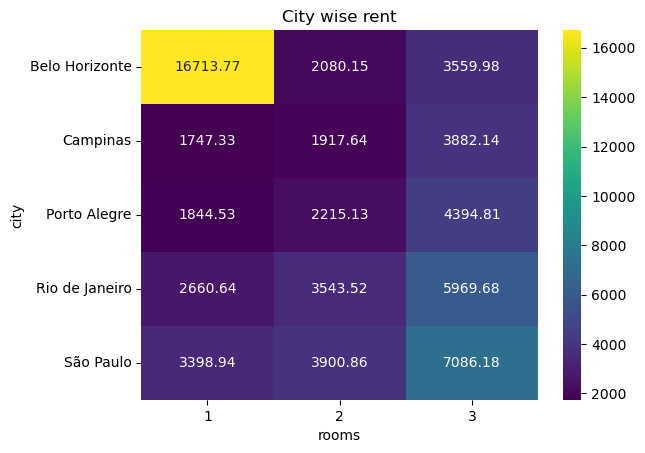

In [246]:
sns.heatmap(t12,annot=True,fmt='.2f',cmap='viridis')
plt.title('City wise rent')

We can see that Porto and Campinas has the most affordable houses

### Houses at higher floors costs more

In [262]:
data5=data[(data['floor']==0)&(data['total (R$)']<50000)]


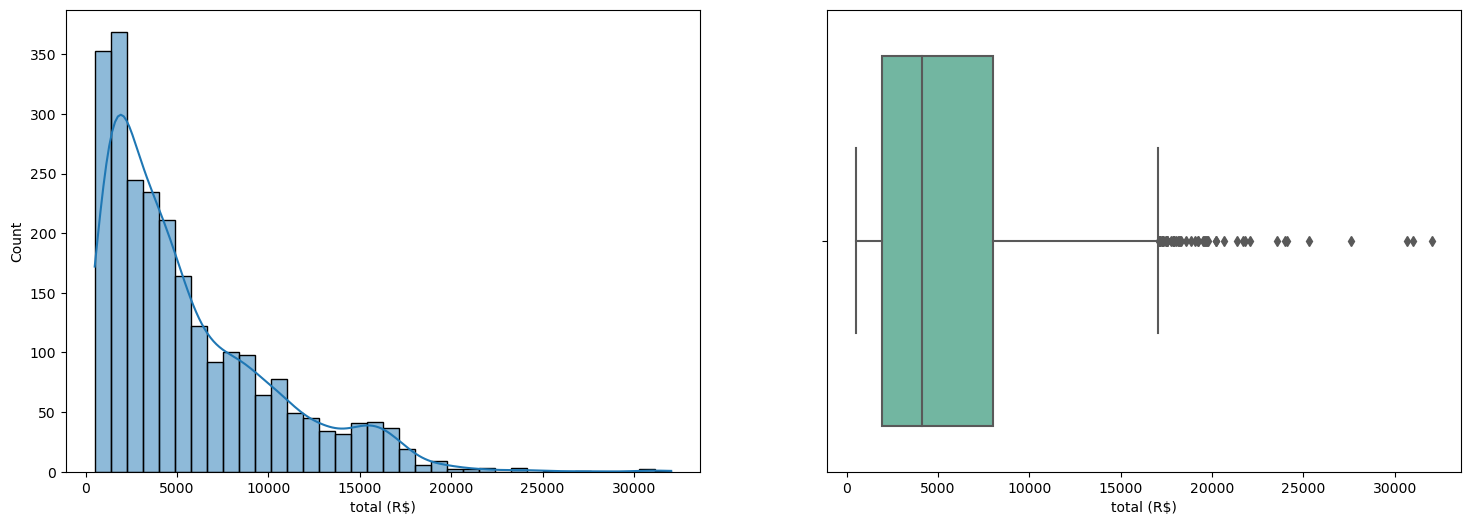

In [263]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = data5['total (R$)'], ax = ax[0],kde=True,palette='Set3') 
sns.boxplot(x = data5['total (R$)'],palette='Set2', ax = ax[1])
plt.show()

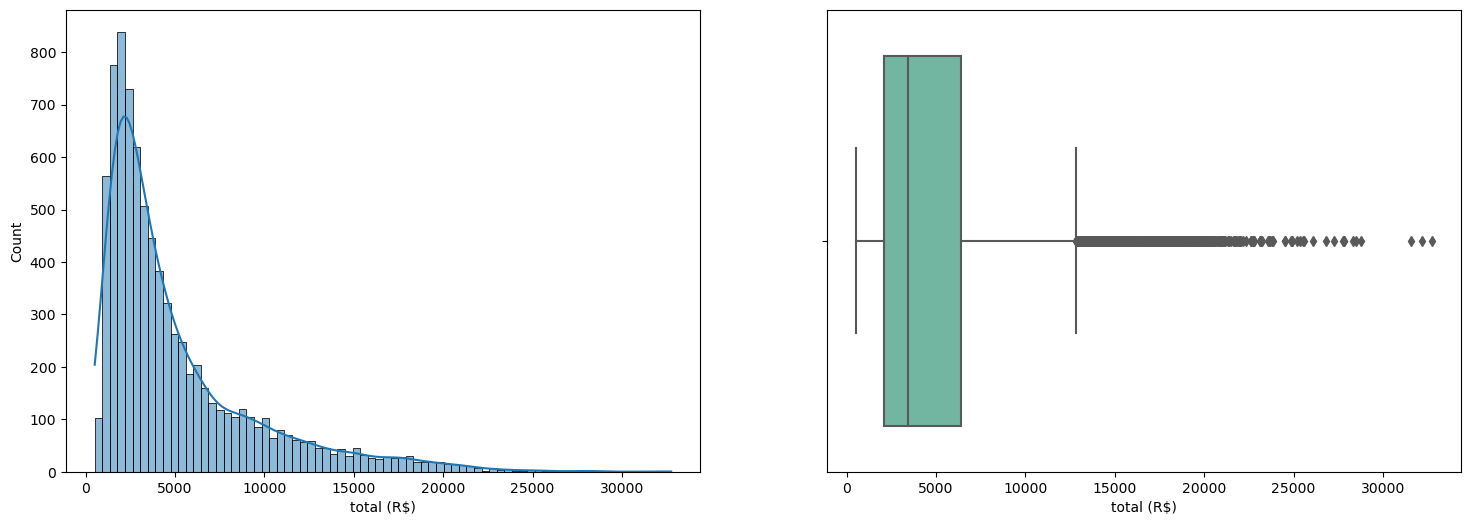

In [261]:
data6=data[(data['floor']>0)&(data['total (R$)']<50000)]
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = data6['total (R$)'], ax = ax[0],kde=True,palette='Set3') 
sns.boxplot(x = data6['total (R$)'],palette='Set2', ax = ax[1])
plt.show()

we can see that for some houses the rent is going near and beyond 30k, so we can say that houses in higher floors may cost more

#### Conclusion

Porto Alegre is the most suitable city for relocation since the cost of living and house rent are considerably cheaper and 
it has more variety of options and facilities for the people to choose from.